# Simple timecourse

In this example, a simple timecourse is defined for a simple ODE. Simulation and optimization is demonstrated.

The ODE is $\frac{d}{dt} x = p  q$, with $p$ an estimated parameter, and $q$ a timecourse parameter.

NB: in code, symbols are suffixed with `_` to avoid conflicts with packages.

In [1]:
from itertools import chain
from pathlib import Path
#from tempfile import NamedTemporaryFile
#from typing import Sequence, Tuple
#from warnings import warn

#import amici
#from amici.petab_import import import_petab_problem
#from amici.petab_objective import simulate_petab
import numpy as np
#import pandas as pd
import petab
#import pytest
#import yaml2sbml

import petab_timecourse

from simple_timecourse_helpers import get_analytical_x_, get_analytical_sx_

petab_path = Path('input') / 'simple_timecourse'

timecourse_id = 'timecourse1'

true_p_ = 1

In [2]:
petab_problem = petab.Problem.from_yaml(str(petab_path / 'petab.yaml'))

The parameter timecourse is represented graphically here. At the indicated timepoints, the value of $q$ (`q_`) changes.
<img src="input/simple_timecourse/timecourse.png" width="400">

In [3]:
timecourse_df = petab_timecourse.get_timecourse_df(petab_path / 'timecourse.tsv')
petab_problem.timecourse_df = timecourse_df
timecourse = petab_timecourse.Timecourse.from_df(timecourse_df, timecourse_id)

In [4]:
from petab_timecourse.amici import collect_x, collect_sx, collect_t

results = petab_timecourse.simulate_timecourse(
    parent_petab_problem=petab_problem,
    timecourse_id=timecourse_id,
)

x_ = collect_x(results)
sx_ = collect_sx(results)
T = collect_t(results)

analytical_x_  = [np.round(get_analytical_x_(t, timecourse=timecourse, p_=true_p_), 5)  for t in T]
analytical_sx_ = [np.round(get_analytical_sx_(t, timecourse=timecourse), 5) for t in T]

# The state (x_) trajectory is correct.
#assert np.isclose(x_, analytical_x_).all()
# The state (x_) forward sensitivity w.r.t. the parameter (p_) is correct.
#assert np.isclose(sx_, analytical_sx_).all()

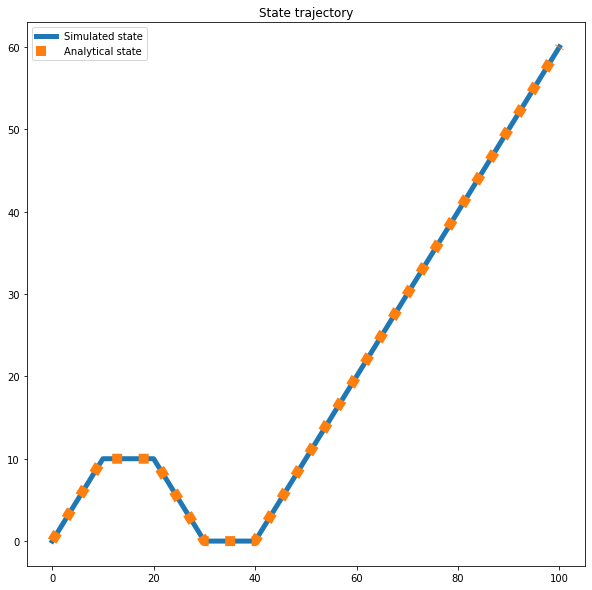

In [5]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(T, x_, lw=5, label='Simulated state')
ax.plot(T, analytical_x_, linestyle=':', lw=10, label='Analytical state')
ax.legend()
ax.set_title('State trajectory');

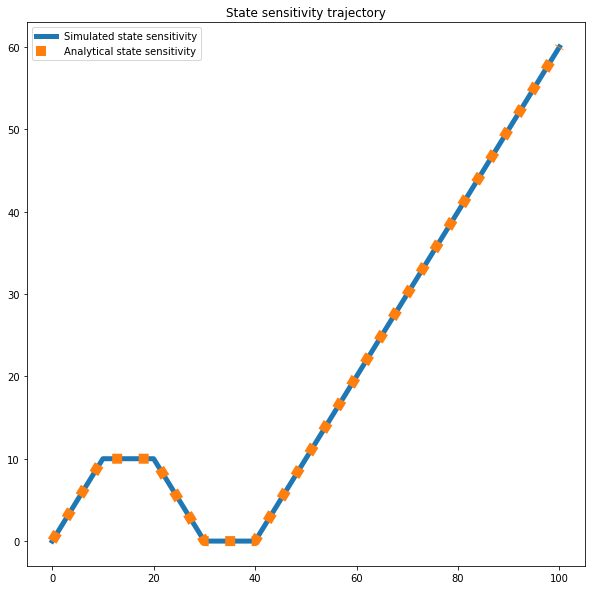

In [6]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(T, x_, lw=5, label='Simulated state sensitivity')
ax.plot(T, analytical_x_, linestyle=':', lw=10, label='Analytical state sensitivity')
ax.legend()
ax.set_title('State sensitivity trajectory');